# Problem 4: Metropolis Calculation for 1D Ising spins

## Task 1: Monte Carlo Simulation

In [1]:
#Necessary imports 

import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Defining analytical functions

# def U(j, t):
#     return -j * np.tanh(j / (k * T))

def Cv_theory(j, t):
    return k * ((j / (k * t)) * (1 / (np.cosh(j/(k * t))))) ** 2


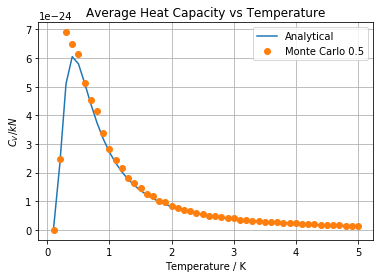

In [3]:
# Pseduo code as python code - comparing the Monte Carlo points with the analytical result

# seed for random number generator
seed = random.randint(0, 2**32 - 1)
random.seed(seed)

N = 500 # N sites
L = N*2000 # 2000 calcs / site
k = 1.38065e-23 # J/K.
J = 0.5 * k # J

# Different coupling energies and temperatures
T_values = np.linspace(0.1, 5.0, 50)
# J_values = np.linspace(0.1 * k, 0.5 * k, 3)

# for J in J_values:

# Set temperature range from 1-5 K

Cv_values = []

# Compute values of Cv at different temperatures
for T in T_values:

    spin = np.ones(N)

    # deltaE can take values ( -4, 0, 4), however, only the
    # positive value is used in the metropolis test, hence we define
    # probability P for the Metropolis test outside the loop.

    # probability in Metropolis test
    P = np.exp(-4.0 * J / (k * T))

    for i in range(N):
        spin[i] = -1 # initial distribution

    Enrg = -J * N # all spins aligned initially
    tot_Enrg = 0
    tot_Enrg2 = 0

    # start Metropolis

    for num in range(L):
        i = random.randint(0, N - 1) # choose spin at random

    # Boundary condition follow
        indx1 = (i + 1) % N
        indx2 = (i - 1) % N

        DeltaE = 2 * J * spin[i] * (spin[indx1] + spin[indx2])

    # Metropolis test next

        if DeltaE <= 0 or random.random() < P: # rand between 0 and 1
            spin[i] = -spin[i] # flip spin
            Enrg = Enrg + DeltaE # add in energy

        tot_Enrg = tot_Enrg + Enrg
        tot_Enrg2 = tot_Enrg2 + Enrg ** 2

    # temperature = T
    avE = tot_Enrg / L # total <E > , N sites
    avE2 = tot_Enrg2 / L # total <E2> , N sites
    Cv = 1 / (k * T ** 2) * (avE2 - avE ** 2) / N
    Cv_values.append(Cv)

    Analytical_Cv_values = np.array([Cv_theory(J, T) for T in T_values])

plt.plot(T_values, Analytical_Cv_values, linestyle="-", label="Analytical")
plt.plot(T_values, Cv_values, marker="o", linestyle="None", label=f"Monte Carlo {J / k:.1f}")


# Plot:

# plt.plot(T_values, Cv_values, marker="o", linestyle="-", color="magenta", label=r"$C_V / kN$")
plt.xlabel("Temperature / K")
plt.ylabel(r"$C_V / kN$")
plt.title("Average Heat Capacity vs Temperature")
plt.legend()
plt.grid(True)
plt.show()

There is better agreement between the Monte Carlo calculation and the analytical result as the temperature increases away from the temperature at which the heat capacity is at its maximum.

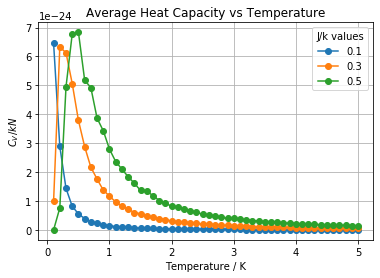

In [4]:
# Pseduo code as python code

# seed for random number generator
seed = random.randint(0, 2**32 - 1)
random.seed(seed)

N = 500 # N sites
L = N*2000 # 2000 calcs / site
k = 1.38065e-23 # J/K.
# J = 0.5 * k # J

# Different coupling energies and temperatures
T_values = np.linspace(0.1, 5.0, 50)
J_values = np.linspace(0.1 * k, 0.5 * k, 3)

for J in J_values:

    # Set temperature range from 1-5 K
    
    Cv_values = []

    # Compute values of Cv at different temperatures
    for T in T_values:

        spin = np.ones(N)

        # deltaE can take values ( -4, 0, 4), however, only the
        # positive value is used in the metropolis test, hence we define
        # probability P for the Metropolis test outside the loop.

        # probability in Metropolis test
        P = np.exp(-4.0 * J / (k * T))

        for i in range(N):
            spin[i] = -1 # initial distribution

        Enrg = -J * N # all spins aligned initially
        tot_Enrg = 0
        tot_Enrg2 = 0

        # start Metropolis

        for num in range(L):
            i = random.randint(0, N - 1) # choose spin at random

        # Boundary condition follow
            indx1 = (i + 1) % N
            indx2 = (i - 1) % N

            DeltaE = 2 * J * spin[i] * (spin[indx1] + spin[indx2])

        # Metropolis test next

            if DeltaE <= 0 or random.random() < P: # rand between 0 and 1
                spin[i] = -spin[i] # flip spin
                Enrg = Enrg + DeltaE # add in energy

            tot_Enrg = tot_Enrg + Enrg
            tot_Enrg2 = tot_Enrg2 + Enrg ** 2

        # temperature = T
        avE = tot_Enrg / L # total <E > , N sites
        avE2 = tot_Enrg2 / L # total <E2> , N sites
        Cv = 1 / (k * T ** 2) * (avE2 - avE ** 2) / N
        Cv_values.append(Cv)

    plt.plot(T_values, Cv_values, marker="o", linestyle="-", label=f"{J / k:.1f}")

# Plot:

# plt.plot(T_values, Cv_values, marker="o", linestyle="-", color="magenta", label=r"$C_V / kN$")
plt.xlabel("Temperature / K")
plt.ylabel(r"$C_V / kN$")
plt.title("Average Heat Capacity vs Temperature")
plt.legend(title="J/k values")
plt.grid(True)
plt.show()

Decreasing the coupling energy causes the maximum heat capacity to occur at at lower temperatures - as J approaches 0, the temperature where the heat capacity is at its maximum also approaches 0 K. Additionally, the heat capacity decreases more quickly, with a greater change in the gradient. 

## Task 2: Calculating the Entropy

In [5]:
# Seed
seed = random.randint(0, 2**32 - 1)
random.seed(seed)

# Constants
N = 500  # Number of sites
L = N * 2000  # 2000 calculations per site
k = 1.38065e-23  # Boltzmann constant (J/K)
J = 0.1 * k # Chosen value of J


print("A table showing how entropy changes with temperature at fixed J = 0.1k\n")
# print("----------------------------------------------------------------------")
print("Entropy x 10⁻²³ J/K | Temperature K")
print("-----------------------------------")


# Temperature range
T_values = np.linspace(1, 9.0, 5)  # 50 temperatures from 0.1K to 5.0K

plt.figure(figsize=(8, 6))  # Create figure for plotting

# Loop over different J values
# for J in J_values:
entropy_values = []  # Store entropy for this J value

for T in T_values:
    spin = np.ones(N, dtype=int)  # Initialize spins as +1

    # Randomly initialize spins to -1
    for i in range(N):
        spin[i] = -1

    Enrg = -J * N  # Initial energy (aligned spins)
    tot_Enrg = 0
    tot_Enrg2 = 0

    # Metropolis Algorithm
    for num in range(L):
        i = random.randint(0, N - 1)  # Choose a spin randomly

        # Periodic boundary conditions
        indx1 = (i + 1) % N
        indx2 = (i - 1) % N

        DeltaE = 2 * J * spin[i] * (spin[indx1] + spin[indx2])

        # Metropolis test
        if DeltaE <= 0 or random.random() < np.exp(-DeltaE / (k * T)):
            spin[i] = -spin[i]  # Flip spin
            Enrg += DeltaE  # Update energy

        tot_Enrg += Enrg
        tot_Enrg2 += Enrg**2

    # Compute entropy by counting domains
    def count_domains(spins):
        """Counts the number of distinct regions of aligned spins."""
        count = 1  # At least one domain always exists
        for i in range(1, N):
            if spins[i] != spins[i - 1]:  # If spin flips, new domain
                count += 1
        return count

    Ω = count_domains(spin)  # Count the domains
    S = k * np.log(Ω)  # Compute entropy
    
    print(f"        {S/(1e-23):.2f}        |      {T}")

A table showing how entropy changes with temperature at fixed J = 0.1k

Entropy x 10⁻²³ J/K | Temperature K
-----------------------------------
        7.59        |      1.0
        7.63        |      3.0
        7.61        |      5.0
        7.62        |      7.0
        7.64        |      9.0


<Figure size 576x432 with 0 Axes>

## Task 2b: Plotting entropy vs T

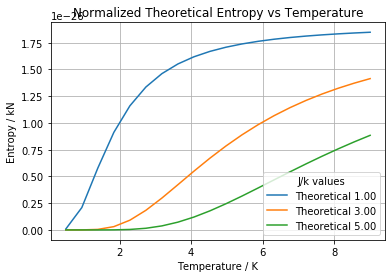

In [6]:
# Constants
k = 1.38065e-23  # Boltzmann constant (J/K)
N = 500  # Number of sites
L = N * 2000  # 2000 Monte Carlo steps per site

# Corrected theoretical entropy function
def theoretical_entropy(j, t):
    """Returns the exact entropy per site (S / kN) for the 1D Ising model."""
    if t == 0:
        return 0  # Entropy must be 0 at absolute zero

    beta = 1 / (k * t)
    x = 2 * j * beta

    # Compute entropy per site
    entropy = np.log(2 * np.cosh(x)) - x * np.tanh(x)
    
    return k * entropy / N  # Normalize by kN


# J values to test
J_values = np.linspace(1 * k, 5 * k, 3)  # Three J values from 1k to 5k
T_values = np.linspace(0.5, 9.0, 20)  # Avoid T=0 by starting at 0.5K

# Plot theoretical entropy per site for each J/k
for J in J_values:
    S_values = np.array([theoretical_entropy(J, T) for T in T_values])
    plt.plot(T_values, S_values, linestyle="-", label=f"Theoretical {J / k:.2f}")

# Plot presentation
plt.xlabel("Temperature / K")
plt.ylabel("Entropy / kN")
plt.title("Normalized Theoretical Entropy vs Temperature")
plt.legend(title="J/k values") 
plt.grid(True)
plt.show()



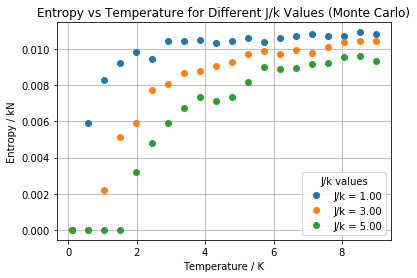

In [11]:
# Seed
seed = random.randint(0, 2**32 - 1)
random.seed(seed)

# Constants
N = 500  # Number of sites
L = N * 2000  # 2000 calculations per site
k = 1.38065e-23  # Boltzmann constant (J/K)

# J values to test
J_values = np.linspace(1 * k, 5 * k, 3)  # Three J values from 0.1k to 0.5k

# Temperature range
T_values = np.linspace(0.1, 9.0, 20)  # 20 temperatures from 0.1K to 9.0K

# Loop over different J values
for J in J_values:
    entropy_values = []  # Store entropy for this J value

    for T in T_values:
        spin = np.ones(N, dtype=int)  # Initialize spins as +1

        # Randomly initialize spins to -1
        for i in range(N):
            spin[i] = -1

        Enrg = -J * N  # Initial energy (aligned spins)
        tot_Enrg = 0
        tot_Enrg2 = 0

        # Metropolis Algorithm
        for num in range(L):
            i = random.randint(0, N - 1)  # Choose a spin randomly

            # Periodic boundary conditions
            indx1 = (i + 1) % N
            indx2 = (i - 1) % N

            DeltaE = 2 * J * spin[i] * (spin[indx1] + spin[indx2])

            # Metropolis test
            if DeltaE <= 0 or random.random() < np.exp(-DeltaE / (k * T)):
                spin[i] = -spin[i]  # Flip spin
                Enrg += DeltaE  # Update energy

            tot_Enrg += Enrg
            tot_Enrg2 += Enrg**2

        # Compute entropy by counting domains
        def count_domains(spins):
            """Calculating the number of distinct regions of aligned spins."""
            count = 1  # one domain always exists
            for i in range(1, N):
                if spins[i] != spins[i - 1]:  # If spin flips, new domain
                    count += 1
            return count
        
        W = count_domains(spin)  # Count the domains
        S = k * np.log(W)  # Compute entropy

        entropy_values.append(S)  # Store for plotting
    
    entropy_plot = np.array(entropy_values) / (k * N)
    
    # Plot Monte Carlo results
    plt.plot(T_values, entropy_plot, marker="o", linestyle="None", label=f"J/k = {J / k:.2f}")

# Plot presentation
plt.xlabel("Temperature / K")
plt.ylabel("Entropy / kN")
plt.title("Entropy vs Temperature for Different J/k Values (Monte Carlo)")
plt.legend(title="J/k values") 
plt.grid(True)
plt.show()


As T approaches zero, entropy also approches zero <br>
As T approaches infinity, entropy tends to a fixed value <br>
Thse two plots have not been plotted on the same axis due to a scaling/normalisation issue which I couldn't resolve but they do show the same trends but due to this, the fixed values that they tend to are different.

## Task 3: Einstein Model for Solids

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in cosh


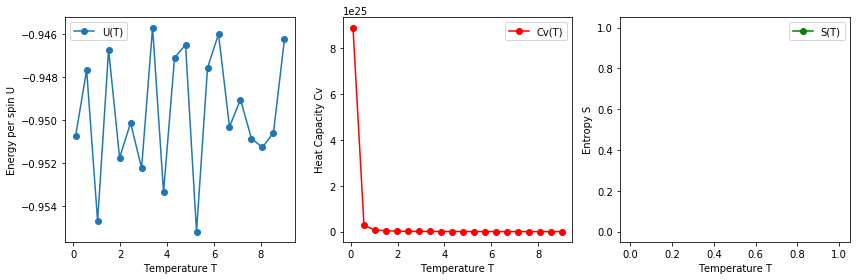

In [12]:
#Einstein Model

def metropolis_simulation(N, B, T_min, T_max, T_steps, mc_steps):
    k = 1.38065e-23  # Boltzmann constant (J/K)
    mu = 1.0  # Magnetic moment
    
    T_values = np.linspace(T_min, T_max, T_steps)
    U_values, Cv_values, S_values = [], [], []
    
    for T in T_values:
        beta = 1 / (k * T)
        spins = np.random.choice([-1, 1], size=N)  # Random initial spin states
        
        E_total = -mu * B * np.sum(spins)
        E_sum, E2_sum = 0, 0
        
        for _ in range(mc_steps):
            i = np.random.randint(N)  # Choose a random spin
            dE = 2 * mu * B * spins[i]  # Energy change if flipped
            
            if dE <= 0 or np.random.rand() < np.exp(-beta * dE):
                spins[i] *= -1  # Flip spin
                E_total += dE  # Update total energy
            
            E_sum += E_total
            E2_sum += E_total**2
        
        avg_E = E_sum / mc_steps
        avg_E2 = E2_sum / mc_steps
        
        U = avg_E / N
        Cv = (1 / (k * T**2)) * (avg_E2 - avg_E**2) / N
        Z = 2 * np.cosh(beta * mu * B)
        S = k * (np.log(Z) - beta * mu * B * np.tanh(beta * mu * B))
        
        U_values.append(U)
        Cv_values.append(Cv)
        S_values.append(S)
    
    return T_values, U_values, Cv_values, S_values

def plot_results(T_values, U_values, Cv_values, S_values):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(T_values, U_values, 'o-', label='U(T)')
    plt.xlabel('Temperature T')
    plt.ylabel('Energy per spin U')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(T_values, Cv_values, 'o-', label='Cv(T)', color='r')
    plt.xlabel('Temperature T')
    plt.ylabel('Heat Capacity Cv')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(T_values, S_values, 'o-', label='S(T)', color='g')
    plt.xlabel('Temperature T')
    plt.ylabel('Entropy S')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Run simulation
N = 500  # Number of spins
B = 1.0  # Magnetic field strength
T_min, T_max, T_steps = 0.1, 9.0, 20  # Temperature range and steps
mc_steps = 10000  # Monte Carlo steps per temperature

T_values, U_values, Cv_values, S_values = metropolis_simulation(N, B, T_min, T_max, T_steps, mc_steps)
plot_results(T_values, U_values, Cv_values, S_values)


The energy per spin has no dependance on T as each spin can be either up or down in the presence of a magnetic field. <br>
The heat capacity decreases with temperature <br>
I struggled to fix the entropy plot

## Bonus Point

I deserve 1/2 a bonus point because I presented some data in an easy to read table and some of my plots are nice. I also found this very challenging so think I deserve some points for effort.

## Self Assessment

#### Task 1: 3 points

I think I answered all parts of the question correctly and efficiently, producing well presented plots


#### Task 2a: 1 point/1 point

I calculated entropy vaues for 5 different temperatures and presented them in a table that is easy to read


#### Task 2b: 0.6 points/0.8 points

I plotted the theroetical and monte carlo simulation data with a slight error in the normalisation that I can't resolve but the shapes and trends are consistent and accurate

#### Task 2c: 0.1 points/0.2 points

I attempted to explain what's happening, could have explained why in more detail - slightly vague


#### Task 3: 1.5 points

I did both parts in the same code so quite efficient, I'm not sure if I did it entirely correctly though. I have 2 out of the 3 plots - not sure what happened to the entropy one

#### Task 4: 2 points

I think my notebook is well presented with good graphs and tables to make the whole thing easier to read

#### Task 5: 0.5 points

The table and some of the graphs are going above what was asked in the question but some of my answers probably go below what is being asked in the question


## Declaration of Academic Integrity

This is all my own work and I marked it fairly